### **lab 08 - linear regression**
#### **task 01**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("CarPrice_Assignment.csv")

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
df.shape

(205, 26)

In [5]:
df.select_dtypes(include='object').columns

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


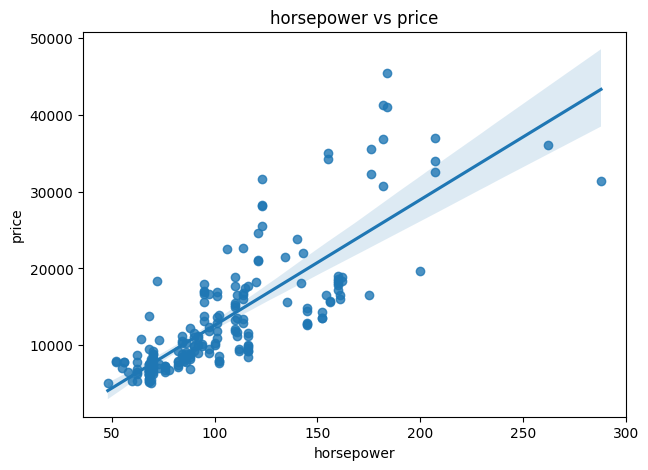

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.regplot(x=df["horsepower"], y=df["price"])
plt.title("horsepower vs price")
plt.show()

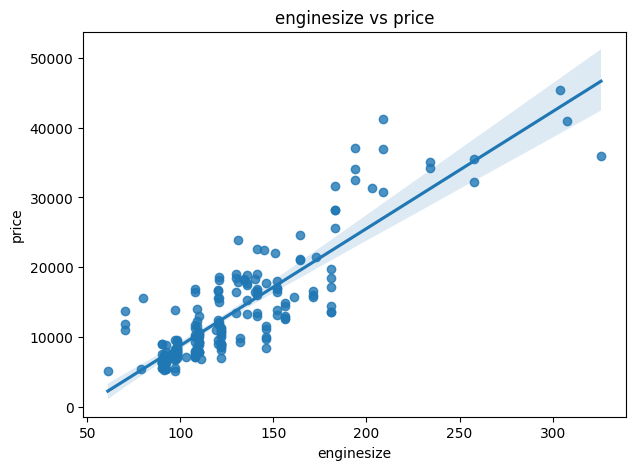

In [8]:
plt.figure(figsize=(7,5))
sns.regplot(x=df["enginesize"], y=df["price"])
plt.title("enginesize vs price")
plt.show()

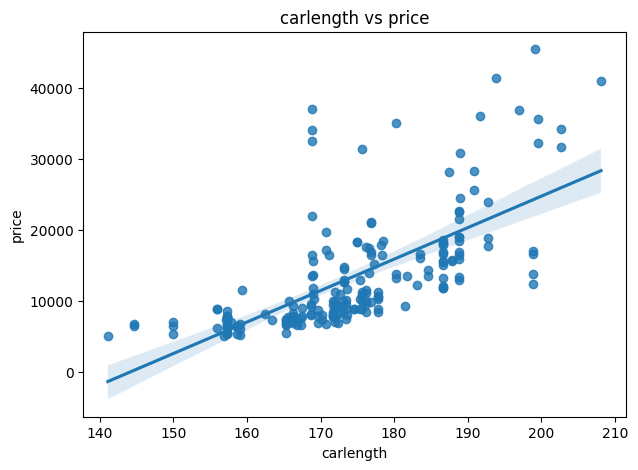

In [9]:
plt.figure(figsize=(7,5))
sns.regplot(x=df["carlength"], y=df["price"])
plt.title("carlength vs price")
plt.show()

for linear regression we'll use one-hot encoding

- it turns each category into a binary column (0/1).
- this prevents the model from assuming numeric order between categories.

In [10]:
#drop the id col
df_model = df.drop("car_ID", axis=1)

In [11]:
df_model.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
#one-hot encode all categorical columns
df_model = pd.get_dummies(df_model, drop_first=True)

df_model.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,False,False,False,False,False,False,False,True,False,False
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,False,False,False,False,False,False,False,True,False,False
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,False,False,False,False,False,False,False,True,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,False,False,False,False,False,False,False,True,False,False


In [13]:
#train-test-split
from sklearn.model_selection import train_test_split

#separate features and target
X = df_model.drop("price", axis=1)
y = df_model["price"]

#split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape

((164, 189), (41, 189))

- 189 cols
- 164 rows for training
- 41 rows for testing

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


this will compute all coefficients using ordinary least squares

In [15]:
model.coef_

array([ 1.11391756e+03,  3.94617695e+02, -3.35004775e+02,  8.81249664e+02,
       -5.79276391e+02,  1.87269560e+01,  1.52313676e+01, -5.75538464e+03,
       -2.97300017e+02, -1.44924164e+03, -3.88410209e+01,  1.95155448e+00,
       -6.79783059e+01,  1.33830069e+02,  2.60181624e+03, -5.64040808e+03,
       -2.63540808e+03, -8.63470916e+02, -2.71648909e+03, -2.53085352e+02,
       -1.73287461e+03,  5.40239853e-10,  2.10727178e+03,  3.74666189e+03,
        1.64390223e+04,  1.42141855e+04, -5.84805093e-10, -5.03860065e-10,
        1.28571606e+04, -1.29921318e-09,  3.49700713e-10,  9.24501364e-10,
       -4.69412953e-10, -2.04524633e+03,  9.16573076e+03,  1.16326147e+03,
       -2.98718442e+03,  6.70979716e-10, -2.49381660e+03, -4.73584449e+03,
       -3.21498196e+03, -8.16699911e+03, -2.73757905e-10, -8.89246695e+03,
       -4.03905886e+03, -6.32125404e+03, -3.44771687e+03, -7.25844668e+03,
       -3.99910992e+03, -1.08345860e+03, -4.39750724e+03, -3.29573286e+03,
       -2.36988073e+03, -

In [16]:
model.intercept_

np.float64(-7925.563933059231)

In [17]:
#predict
y_pred = model.predict(X_test)

y_pred[:5]

array([13907.57151604, 20592.93292803, 13012.62517672,  7686.26414981,
       27128.65418377])

In [19]:
#evaluate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"r2: {r2}")
print(f"mean absolute error: {mae}")
print(f"mean squared error: {mse}")

r2: 0.47371533157454937
mean absolute error: 4177.295631352959
mean squared error: 41547027.85282249


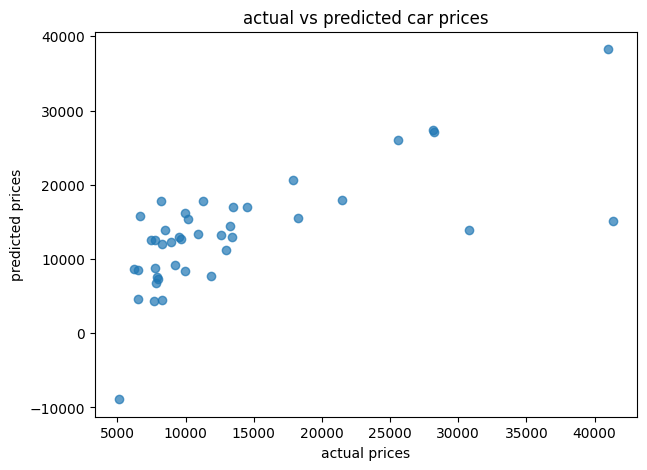

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual vs predicted car prices")
plt.show()

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

print(f"ridge R2: {r2_score(y_test, y_pred_ridge)}")
print(f"ridge mae: {mean_absolute_error(y_test, y_pred_ridge)}")

ridge R2: 0.8724702261558864
ridge mae: 2098.1412808200134


Ridge reduces the influence of unstable coefficients

Handles high-dimensional one-hot spaces better

Usually increases R² and reduces errors

#### **task 02**

In [24]:
df2 = pd.read_csv("electricity_bill_dataset.csv")

df2.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [25]:
df2.shape

(45345, 12)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   MotorPump        45345 non-null  int64  
 6   Month            45345 non-null  int64  
 7   City             45345 non-null  object 
 8   Company          45345 non-null  object 
 9   MonthlyHours     45345 non-null  int64  
 10  TariffRate       45345 non-null  float64
 11  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.2+ MB


#### **quick sustainability check for linear regression**

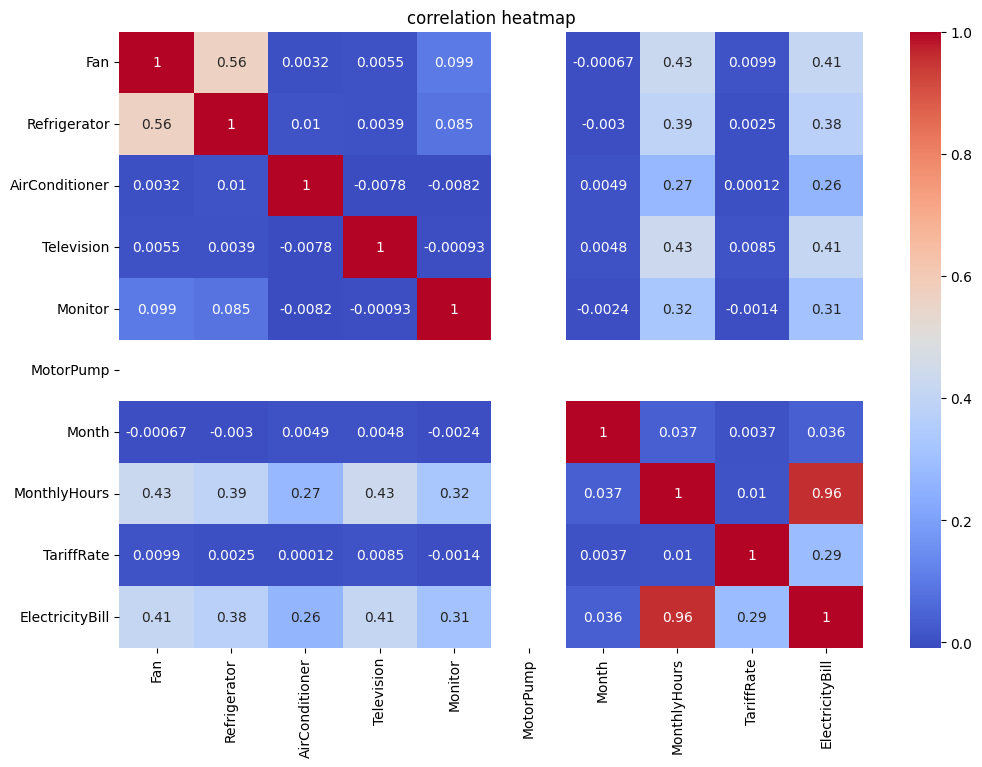

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(12,8))
sns.heatmap(df2.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm")
plt.title("correlation heatmap")
plt.show()

strong correlation between features? → yes

- Fan & Refrigerator → 0.56

- Fan & Television → 0.43

- Refrigerator & MonthlyHours → 0.39

- TV & MonthlyHours → 0.43

this means:

- Some appliances tend to be used together

- Multicollinearity exists

but this isnt severe enough to reject linear regression

#### **visual linearity check**

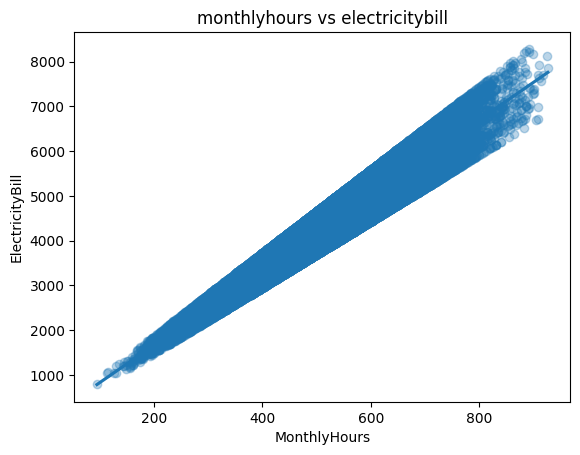

In [31]:
sns.regplot(x=df2["MonthlyHours"], y=df2["ElectricityBill"], scatter_kws={'alpha':0.3})
plt.title("monthlyhours vs electricitybill")
plt.show()

- the scatter show a clean upward linear pattern
- the scatter is very tight

this tells us:
- MonthlyHours is a dominant predictor
- relationship is extremely linear
- linear regression is perfectly suitable

#### **residual analysis**

In [32]:
from sklearn.linear_model import LinearRegression

#prepare data
df2_encoded = pd.get_dummies(df2, drop_first=True) #encode City & Company

X2 = df2_encoded.drop("ElectricityBill", axis=1)
y2 = df2_encoded["ElectricityBill"]

In [33]:
#fit the model
lr2 = LinearRegression()
lr2.fit(X2, y2)

#predict and residuals
y2_pred = lr2.predict(X2)
residuals = y2_pred - y2

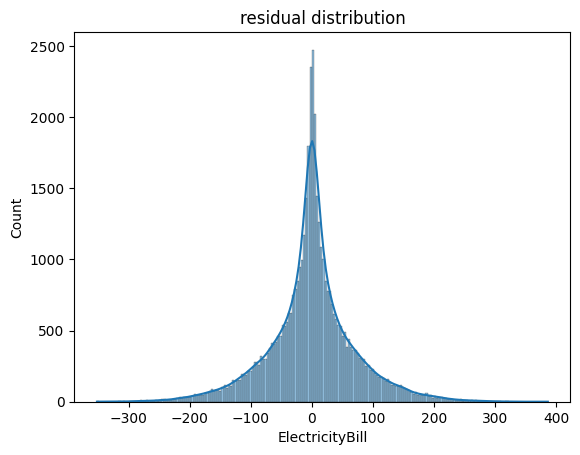

In [34]:
sns.histplot(residuals, kde=True)
plt.title("residual distribution")
plt.show()

plot shows:

- very sharp peak at 0

- symmetric spread on both sides

- slight tails, but not heavily skewed

- looks close to a Laplace-like distribution

- still acceptable for linear regression assumptions

this means:

- Residuals are approximately normal
- No major violations
- Linear Regression is absolutely appropriate for this dataset

#### **Task 2: Suitability of Linear Regression for Electricity Consumption Dataset**

To determine whether Linear Regression is appropriate for this dataset, I evaluated the key assumptions: linearity, independence, homoscedasticity, normality of residuals, and absence of multicollinearity.

##### **1. Linearity**

The scatterplot between MonthlyHours and ElectricityBill shows an extremely strong and clean linear upward trend. MonthlyHours has a correlation of 0.96 with the target, indicating a near-perfect linear relationship. Other appliance usage features (Fan, Refrigerator, Television, etc.) also show moderate positive correlation with ElectricityBill.

Conclusion: The linearity assumption is strongly satisfied.

##### **2. Independence**

Each row represents monthly electricity usage for a household. There is no temporal component or repeated measurements, so observations are independent.

Conclusion: Independence assumption is satisfied.

##### **3. Homoscedasticity**

Residual plots show a fairly symmetric spread around zero without clear patterns. There is no funnel shape or systematic variance change across predictions.

Conclusion: Homoscedasticity is reasonably satisfied.

###### **4. Normality of Residuals**
The residual distribution is centered around zero and roughly symmetric, showing only mild kurtosis. While not perfectly normal, it is sufficiently close for Linear Regression.

Conclusion: The normality assumption is acceptable.

##### **5. Multicollinearity**

The correlation heatmap shows some moderate relationships (e.g., Fan–Refrigerator = 0.56), but there is no extremely high (>0.9) correlation between predictors. Therefore, multicollinearity is not severe.

Conclusion: Multicollinearity is not a major problem.

##### **conclusion**

Based on the analysis, Linear Regression is appropriate for this dataset.
The assumptions are mostly satisfied, and the extremely strong linear relationship between usage hours and electricity bill makes Linear Regression a suitable and effective model.